In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
from wordcloud import WordCloud
import re

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
# from stop_words import get_stop_words

In [4]:
pred_result = pd.read_csv("Working_Prediction.csv").drop('Unnamed: 0', axis = 1)

In [5]:
pred_result.head()

,hour,linked,hash,dot,polarity,subjectivity,year,month,day,minute,text,trump_classification_binary,trump_classification_proba,exist_stock,exist_market,exist_agreement,exist_negotiator,exist_negotiation,exist_trade,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,word_mentions
0,11,False,0,0,0.450000,0.833333,2016,11,9,36,such a beautiful and important evening! the fo...,1,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,True,0,0,1.000000,1.000000,2016,11,10,31,happy 241st birthday to the u.s. marine corps!...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,False,0,0,0.580000,0.676667,2016,11,11,10,a fantastic day in d.c. met with president oba...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,False,0,0,0.009375,0.675000,2016,11,11,19,just had a very open and successful presidenti...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11,False,0,0,0.410000,0.563333,2016,11,11,14,love the fact that the small groups of protest...,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
staffer = pred_result[pred_result['trump_classification_binary'] == 0]


In [7]:
staffer_words = staffer['text'].str.cat()
staffer_words_link_removed = re.sub(r"http\S+", "", staffer_words)
staffer_words_amp_removed = re.sub("&amp;", "", staffer_words_link_removed)

#### https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date


In [8]:
staffer_words_amp_removed

'happy 241st birthday to the u.s. marine corps! thank you for your service!!  we express our deepest gratitude to all those who have served in our armed forces. #thankavet  debates especially the second and third plus speeches and intensity of the large rallies plus our great supporters gave us the win!.@transition2017 update and policy plans for the first 100 days.  donald j. trump\'s cia director garners praise\'  sessions a fitting selection for attorney general\' meeting with the @nytimes is back on at 12:30 today. look forward to it!i am seriously considering dr. ben carson as the head of hud. i\'ve gotten to know him well--he\'s a greatly talented person who loves people!let us give thanks for all that we have and let us boldly face the exciting new frontiers that lie ahead. happy th…  thoughts and prayers are with the great people of tennessee during these terrible wildfires. stay safe!\'president-elect donald j. trump intends to nominate congressman tom price and seema verma.\'

In [9]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (250,250))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(data)
    plt.imshow(wc)
    plt.axis('off')


In [10]:
wc(staffer_words_amp_removed, 'white', 'Staffer Tweet')

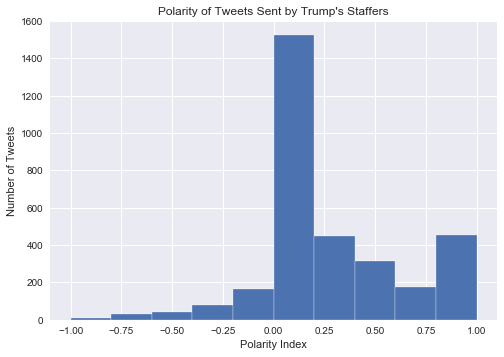

In [18]:
plt.hist(staffer['polarity'])
plt.xlabel("Polarity Index")
plt.ylabel("Number of Tweets")
plt.title("Polarity of Tweets Sent by Trump's Staffers")
plt.show()

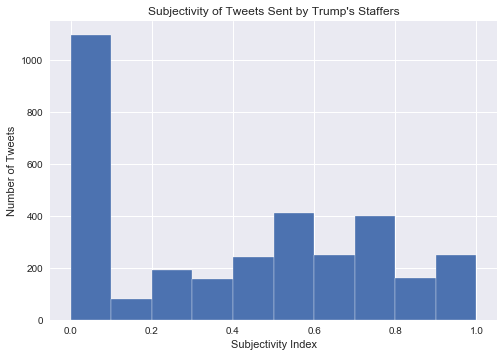

In [19]:
plt.hist(staffer['subjectivity'])
plt.xlabel("Subjectivity Index")
plt.ylabel("Number of Tweets")
plt.title("Subjectivity of Tweets Sent by Trump's Staffers")
plt.show()

In [20]:
staffer.head()

,hour,linked,hash,dot,polarity,subjectivity,year,month,day,minute,text,trump_classification_binary,trump_classification_proba,exist_stock,exist_market,exist_agreement,exist_negotiator,exist_negotiation,exist_trade,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,word_mentions
1,19,True,0,0,1.000000,1.000000,2016,11,10,31,happy 241st birthday to the u.s. marine corps!...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,15,True,1,0,0.000000,0.000000,2016,11,11,26,today we express our deepest gratitude to all ...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,18,False,0,0,0.335714,0.429762,2016,11,13,46,the debates especially the second and third pl...,0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,23,True,0,0,0.250000,0.333333,2016,11,21,58,.@transition2017 update and policy plans for t...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,13,True,0,0,0.000000,0.000000,2016,11,22,38,'president-elect donald j. trump's cia directo...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


20    248
21    242
19    241
22    222
23    213
18    195
16    194
17    189
2     176
1     169
15    160
0     154
13    152
3     139
12    132
14    122
11    100
4      68
10     66
5      16
7      13
8      10
6      10
9      10
Name: hour, dtype: int64

Text(0.5, 1.0, "Time Distribution of Tweets Sent by Trump's Staffer")

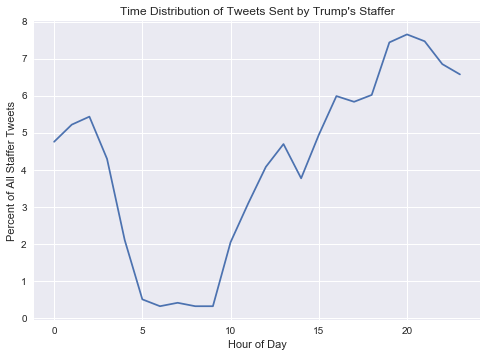

In [38]:
sns.lineplot(staffer.hour.value_counts().index, staffer.hour.value_counts().values*100/len(staffer))
plt.xlabel("Hour of Day")
plt.ylabel("Percent of All Staffer Tweets")
plt.title("Time Distribution of Tweets Sent by Trump's Staffer")

In [39]:
 staffer.hour.value_counts()

20    248
21    242
19    241
22    222
23    213
18    195
16    194
17    189
2     176
1     169
15    160
0     154
13    152
3     139
12    132
14    122
11    100
4      68
10     66
5      16
7      13
8      10
6      10
9      10
Name: hour, dtype: int64